In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

1. Рассмотрим t-критерий и критерий Манна-Уитни: применим их для сравнения однородности двух выборок из распределения из а) N(0,1) распределения и N(μ,1) распределения, б) распределения Laplace(0,1) и Laplace(μ,2) распределения, взяв размеры выборок равные а) 10, б) 50, в) 100. Используйте разные виды критериев, меняя настройки: для t-критерия equal_var и permutations, для Манна-Уитни – exact и asymptotic method. Построить график мощности всех версий критериев в зави- симости от μ.

In [43]:
def power(mu,n,case):
	pval_t_evt_pnone=0
	pval_t_evt_pn=0
	
	pval_t_evf_pnone=0
	pval_t_evf_pn=0
	
	pval_mw_exact=0
	pval_mw_asymptotic=0
	
	for i in range(1000):
		if case=='N':
			x=np.random.normal(loc=0,scale=1,size=n)
			y=np.random.normal(loc=mu,scale=1,size=n)
		else:
			x=np.random.laplace(loc=0,scale=1,size=n)
			y=np.random.laplace(loc=mu,scale=0.5,size=n)
		if st.ttest_ind(x,y,equal_var=True,permutations=None).pvalue<0.95:
			pval_t_evt_pnone+=1
		if st.ttest_ind(x,y,equal_var=True,permutations=n).pvalue<0.95:
			pval_t_evt_pn+=1
			
		if st.ttest_ind(x,y,equal_var=False,permutations=None).pvalue<0.95:
			pval_t_evf_pnone+=1
		if st.ttest_ind(x,y,equal_var=False,permutations=n).pvalue<0.95:
			pval_t_evf_pn+=1
		
		if st.mannwhitneyu(x,y,method='exact').pvalue<0.95:
			pval_mw_exact+=1
		if st.mannwhitneyu(x,y,method='asymptotic').pvalue<0.95:
			pval_mw_asymptotic+=1
		
	return np.array([pval_t_evt_pnone,pval_t_evt_pn,pval_t_evf_pnone,pval_t_evf_pn,pval_mw_exact,pval_mw_asymptotic])/1000

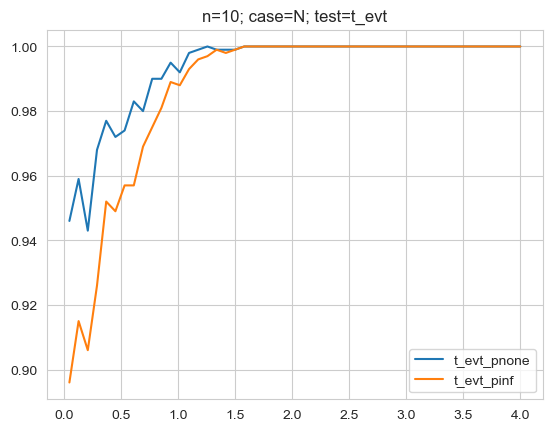

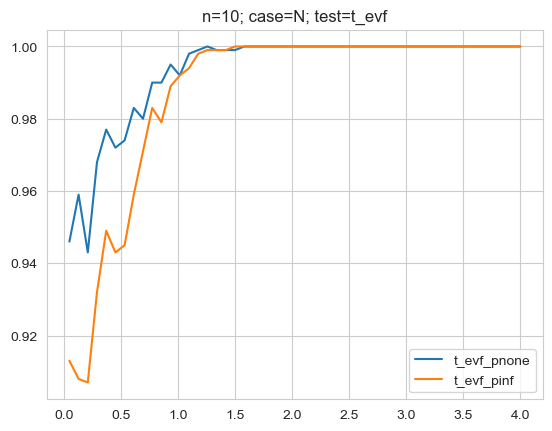

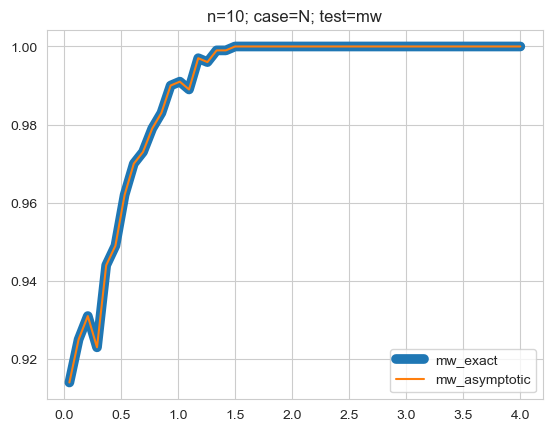

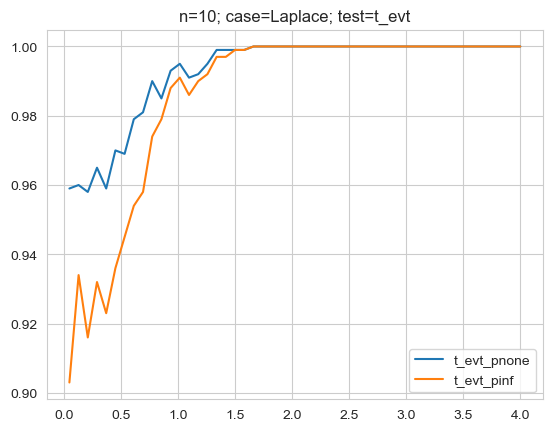

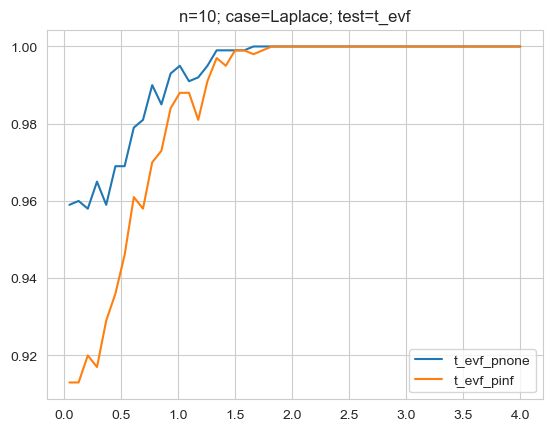

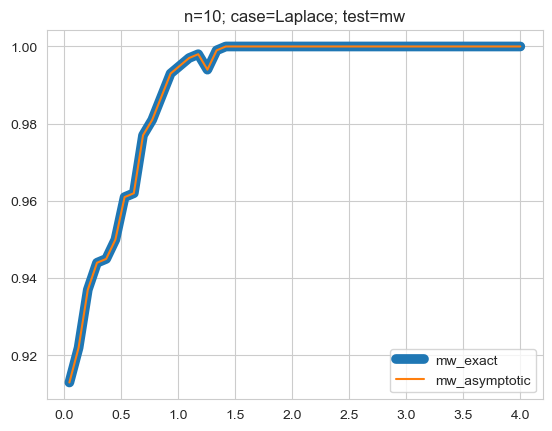

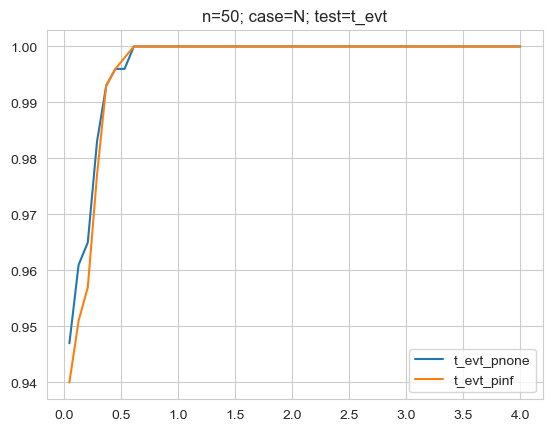

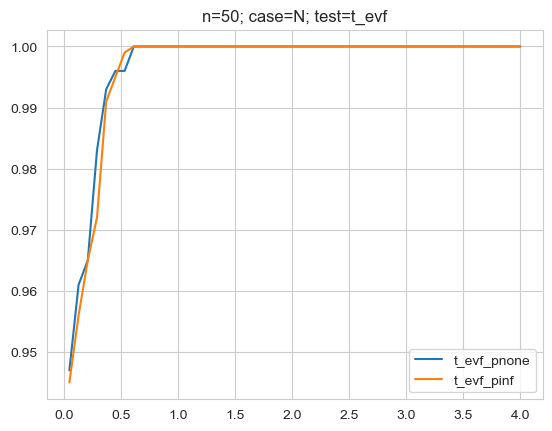

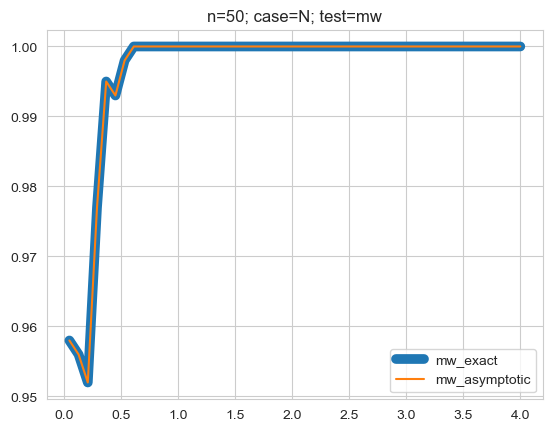

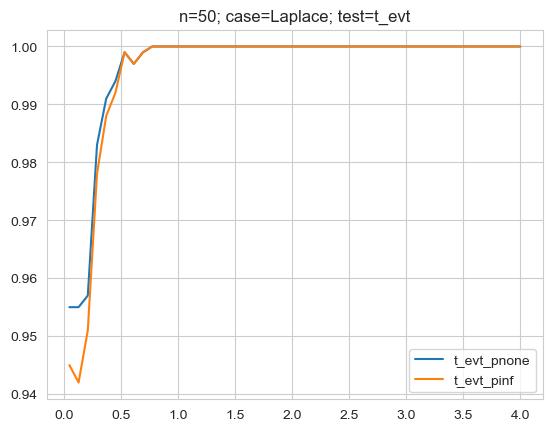

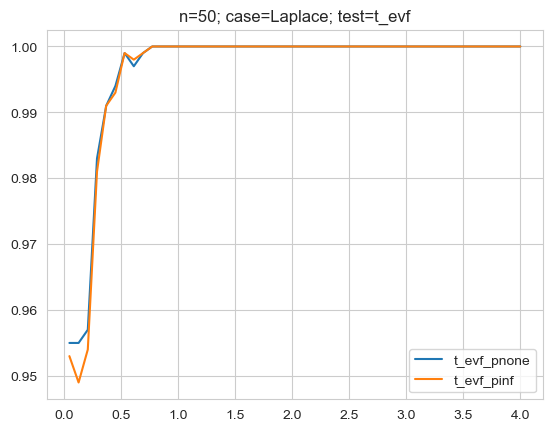

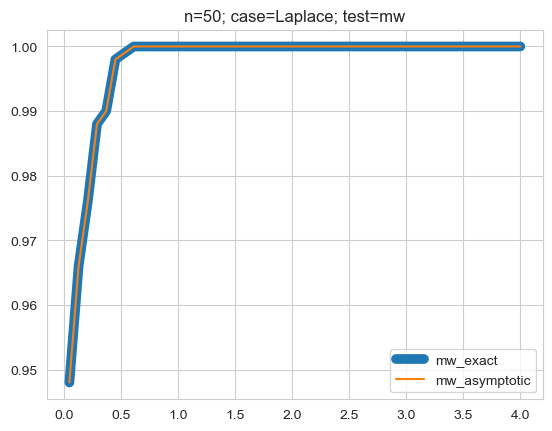

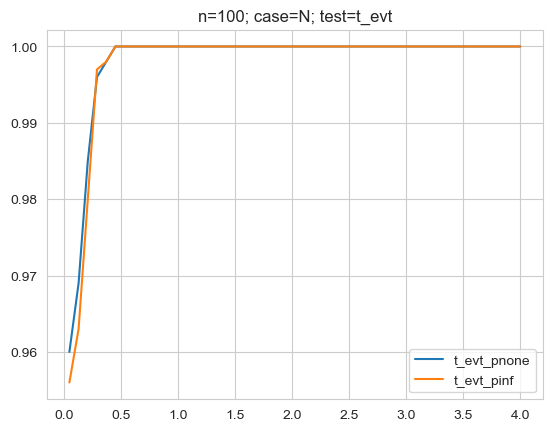

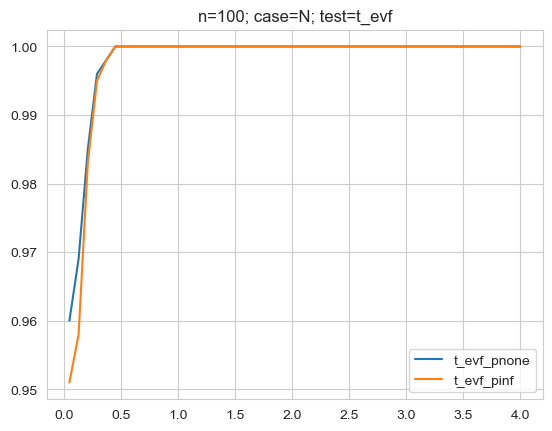

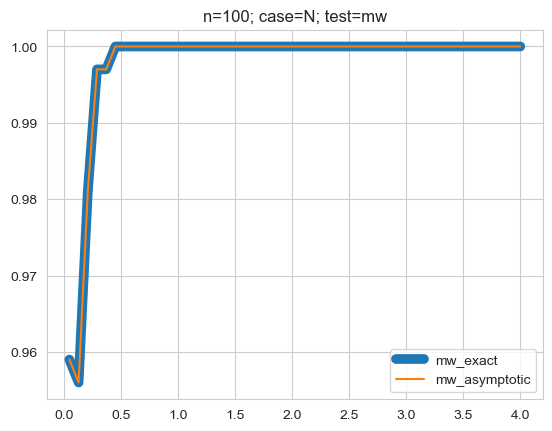

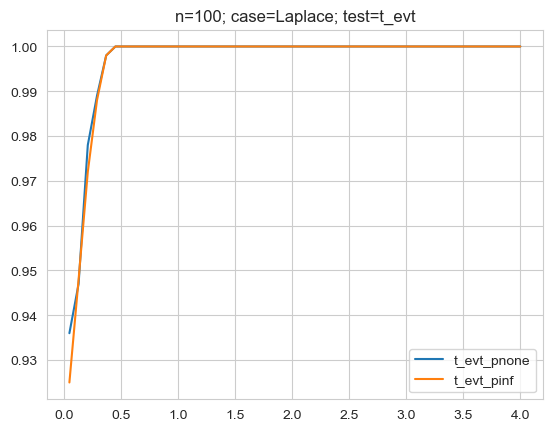

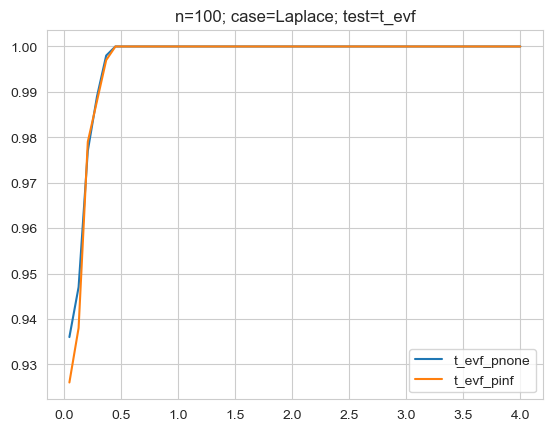

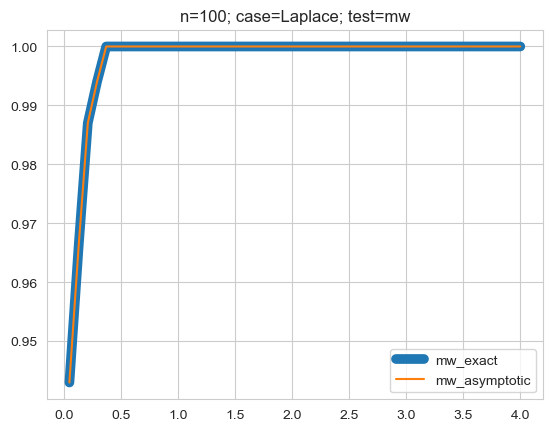

In [45]:
mu=np.linspace(0.05,4,50)
for n in [10,50,100]:
	for case in ['N','Laplace']:
		power_t_evt_pnone=np.zeros(50)
		power_t_evt_pn=np.zeros(50)
		
		power_t_evf_pnone=np.zeros(50)
		power_t_evf_pn=np.zeros(50)
		
		power_mw_exact=np.zeros(50)
		power_mw_asymptotic=np.zeros(50)
		
		for i in range(50):
			power_t_evt_pnone[i],power_t_evt_pn[i],power_t_evf_pnone[i],power_t_evf_pn[i],power_mw_exact[i],power_mw_asymptotic[i]=power(mu[i],n,case)
			
		plt.title('n='+str(n)+'; case='+case+'; test=t_evt')
		plt.plot(mu,power_t_evt_pnone,label='t_evt_pnone')
		plt.plot(mu,power_t_evt_pn,label='t_evt_pinf')
		plt.legend()
		plt.show()
		
		plt.title('n='+str(n)+'; case='+case+'; test=t_evf')
		plt.plot(mu,power_t_evf_pnone,label='t_evf_pnone')
		plt.plot(mu,power_t_evf_pn,label='t_evf_pinf')
		plt.legend()
		plt.show()
		
		plt.title('n='+str(n)+'; case='+case+'; test=mw')
		plt.plot(mu,power_mw_exact,label='mw_exact',linewidth=7)
		plt.plot(mu,power_mw_asymptotic,label='mw_asymptotic')
		plt.legend()
		plt.show()

2. Реализовать критерий Баумгартнера-Вейсса-Шиндлера в перестановочной версии. Проверить его работу на а) R[0, 1] и R[0, 1] выборках б) R[0, 1] и R[0.1, 1.1] выборках. Сравнить с встроенным критерием Стивенса-Шольца (scipy.stats.anderson_ksamp).

In [2]:
def BWS_stat(X,Y):
	n1=len(X)
	n2=len(Y)
	n=n1+n2
	X=np.sort(X)
	Y=np.sort(Y)
	Xranks=[]
	Yranks=[]
	Z=np.sort(np.concatenate((X,Y)))
	x=0
	y=0
	for i in range(n):
		if x<n1:
			if Z[i]==X[x]:
				Xranks.append(i)
				x+=1
			else:
				Yranks.append(i)
				y+=1
		else:
			Yranks.append(i)
			y+=1
	return stat(Xranks,n1,n)+stat(Yranks,n2,n)
def stat(ranks,n1,n):
	result=0
	for i in range(n1):
		result+=(ranks[i]-n*(i+1)/n1)**2/((i+1)/(n1+1)*(1-(i+1)/(n1+1))*(n-n1)*n/n1)
	return result/(2*n1)
def counter(a,A):
	for i in range(len(A)):
		if a>=A[len(A)-i-1]:
			return i/len(A)
	return 0

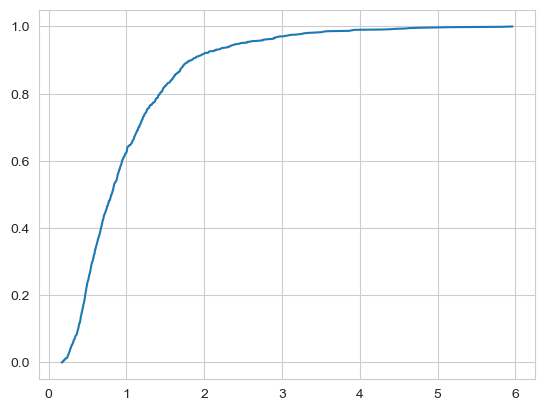

In [3]:
efr=[]
for i in range(1000):
	X=np.random.normal(size=1000,loc=0,scale=1)
	Y=np.random.normal(size=1000,loc=0,scale=1)
	efr.append(BWS_stat(X,Y))
efr=np.sort(efr)
plt.plot(efr,np.linspace(0,1,1000))

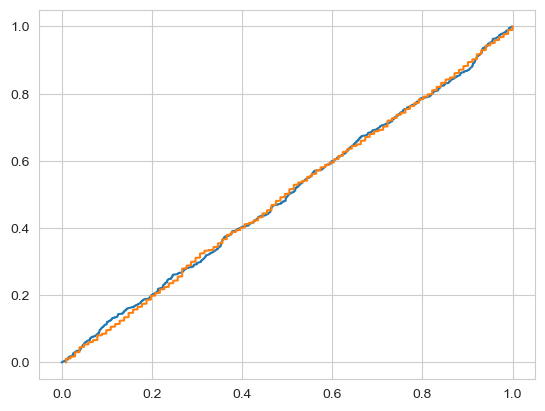

In [8]:
pvals=[]
pvals1=[]
for i in range(1000):
	X=np.random.uniform(size=1000,low=0,high=1)
	Y=np.random.uniform(size=1000,low=0,high=1)
	pvals.append(counter(BWS_stat(X,Y),efr))
	pvals1.append(st.anderson_ksamp([X,Y],method=st.PermutationMethod(n_resamples=100,random_state=np.random.default_rng())).pvalue)
pvals=np.sort(pvals)
pvals1=np.sort(pvals1)
plt.plot(pvals,np.linspace(0,1,1000))
plt.plot(pvals1,np.linspace(0,1,1000))

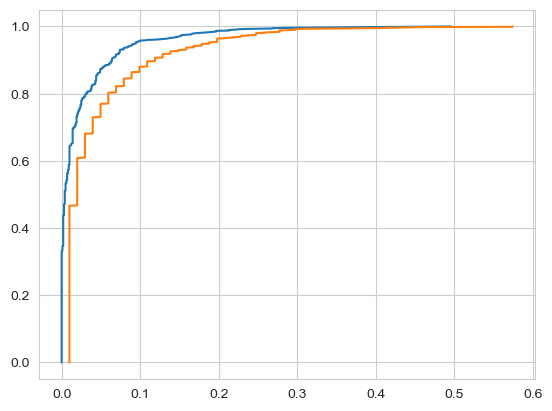

In [9]:
pvals=[]
pvals1=[]
for i in range(1000):
	X=np.random.uniform(size=100,low=0,high=1)
	Y=np.random.uniform(size=100,low=0.1,high=1.1)
	pvals.append(counter(BWS_stat(X,Y),efr))
	pvals1.append(st.anderson_ksamp([X,Y],method=st.PermutationMethod(n_resamples=100,random_state=np.random.default_rng())).pvalue)
pvals=np.sort(pvals)
pvals1=np.sort(pvals1)
plt.plot(pvals,np.linspace(0,1,1000))
plt.plot(pvals1,np.linspace(0,1,1000))

3. Сравнить (построив ЭФР p-value) критерии Манна - Уитни, критерий Смирнова (scipy.stats.ks_2samp),
критерий Стивенса-Шольца (scipy.stats.anderson_ksamp) и BWS на примере следующих модельных
данных:
(a) Xi, Yj ∼ N(0, 1),
(b) Xi ∼ N(0, 1), Yj ∼ N(0.3, 1),
(c) Xi ∼ N(0, 1), Yj ∼ N(0, 3/2),
(d) Xi ∼ N(0, 1), Yj ∼ tk, где tk – распределение Стьюдента с k степенями свободы,
(e) Xi ∼ N(0, 1), Yj – центрированная нормированная сумма k независимых с.в. из равномерного распределения R[−1, 1].
Размер выборки в каждом случае выбирать так, чтобы он был поменьше среди тех, когда часть критериев замечает разницу.

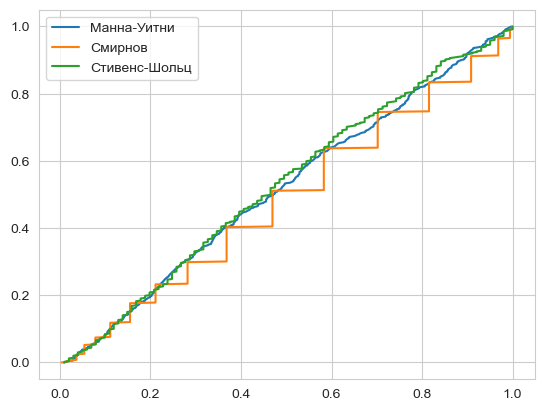

In [68]:
pvalsMW=[]
pvalsKS=[]
pvals1=[]
for i in range(500):
	X=np.random.normal(loc=0,scale=1,size=100)
	Y=np.random.normal(loc=0,scale=1,size=100)
	pvalsMW.append(st.mannwhitneyu(X,Y).pvalue)
	pvalsKS.append(st.ks_2samp(X,Y).pvalue)
	pvals1.append(st.anderson_ksamp([X,Y],method=st.PermutationMethod(n_resamples=100,random_state=np.random.default_rng())).pvalue)
pvalsMW=np.sort(pvalsMW)
pvalsKS=np.sort(pvalsKS)
pvals1=np.sort(pvals1)
plt.plot(pvalsMW,np.linspace(0,1,500),label='Манна-Уитни')
plt.plot(pvalsKS,np.linspace(0,1,500),label='Смирнов')
plt.plot(pvals1,np.linspace(0,1,500),label='Стивенс-Шольц')
plt.legend()
plt.show()

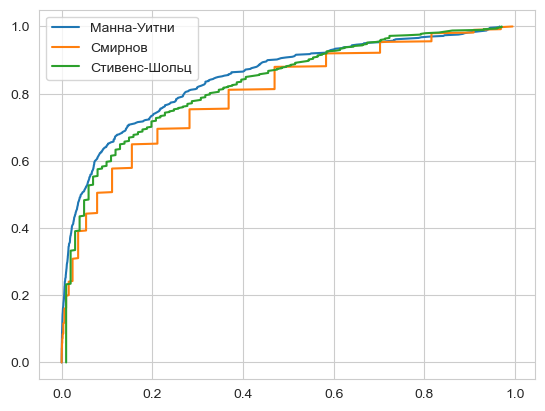

In [69]:
pvalsMW=[]
pvalsKS=[]
pvals1=[]
for i in range(500):
	X=np.random.normal(loc=0,scale=1,size=100)
	Y=np.random.normal(loc=0.3,scale=1,size=100)
	pvalsMW.append(st.mannwhitneyu(X,Y).pvalue)
	pvalsKS.append(st.ks_2samp(X,Y).pvalue)
	pvals1.append(st.anderson_ksamp([X,Y],method=st.PermutationMethod(n_resamples=100,random_state=np.random.default_rng())).pvalue)
pvalsMW=np.sort(pvalsMW)
pvalsKS=np.sort(pvalsKS)
pvals1=np.sort(pvals1)
plt.plot(pvalsMW,np.linspace(0,1,500),label='Манна-Уитни')
plt.plot(pvalsKS,np.linspace(0,1,500),label='Смирнов')
plt.plot(pvals1,np.linspace(0,1,500),label='Стивенс-Шольц')
plt.legend()
plt.show()

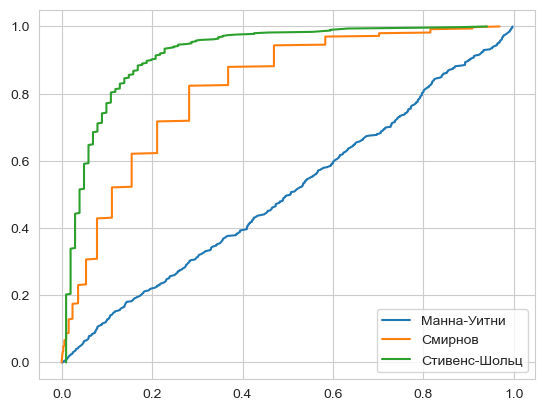

In [70]:
pvalsMW=[]
pvalsKS=[]
pvals1=[]
for i in range(500):
	X=np.random.normal(loc=0,scale=1,size=100)
	Y=np.random.normal(loc=0,scale=1.5,size=100)
	pvalsMW.append(st.mannwhitneyu(X,Y).pvalue)
	pvalsKS.append(st.ks_2samp(X,Y).pvalue)
	pvals1.append(st.anderson_ksamp([X,Y],method=st.PermutationMethod(n_resamples=100,random_state=np.random.default_rng())).pvalue)
pvalsMW=np.sort(pvalsMW)
pvalsKS=np.sort(pvalsKS)
pvals1=np.sort(pvals1)
plt.plot(pvalsMW,np.linspace(0,1,500),label='Манна-Уитни')
plt.plot(pvalsKS,np.linspace(0,1,500),label='Смирнов')
plt.plot(pvals1,np.linspace(0,1,500),label='Стивенс-Шольц')
plt.legend()
plt.show()

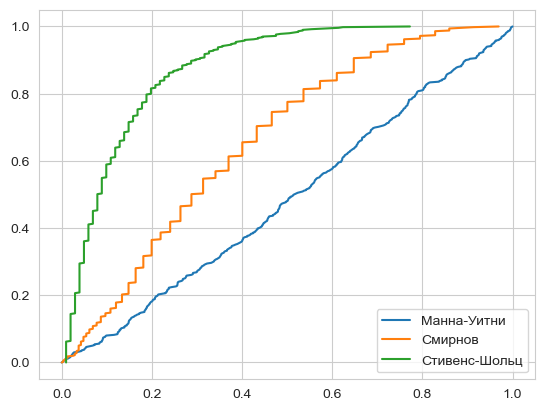

In [72]:
pvalsMW=[]
pvalsKS=[]
pvals1=[]
for i in range(500):
	X=np.random.normal(loc=0,scale=1,size=1000)
	Y=st.t.rvs(df=7,size=1000)
	pvalsMW.append(st.mannwhitneyu(X,Y).pvalue)
	pvalsKS.append(st.ks_2samp(X,Y).pvalue)
	pvals1.append(st.anderson_ksamp([X,Y],method=st.PermutationMethod(n_resamples=100,random_state=np.random.default_rng())).pvalue)
pvalsMW=np.sort(pvalsMW)
pvalsKS=np.sort(pvalsKS)
pvals1=np.sort(pvals1)
plt.plot(pvalsMW,np.linspace(0,1,500),label='Манна-Уитни')
plt.plot(pvalsKS,np.linspace(0,1,500),label='Смирнов')
plt.plot(pvals1,np.linspace(0,1,500),label='Стивенс-Шольц')
plt.legend()
plt.show()

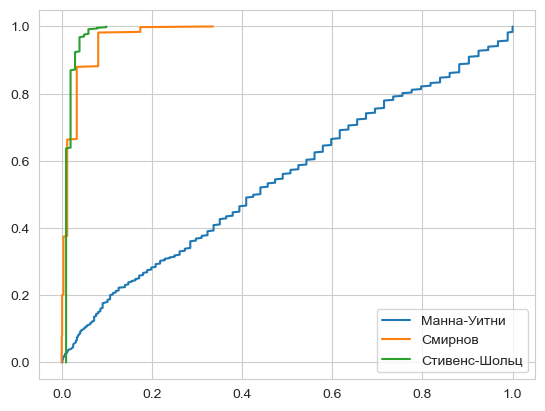

In [81]:
pvalsMW=[]
pvalsKS=[]
pvals1=[]
for i in range(500):
	X=np.random.normal(loc=0,scale=1,size=20)
	Y=np.zeros(20)
	for i in range(20):
		Y[i]=np.sum(np.random.uniform(low=-1,high=1,size=30))*3
	pvalsMW.append(st.mannwhitneyu(X,Y).pvalue)
	pvalsKS.append(st.ks_2samp(X,Y).pvalue)
	pvals1.append(st.anderson_ksamp([X,Y],method=st.PermutationMethod(n_resamples=100,random_state=np.random.default_rng())).pvalue)
pvalsMW=np.sort(pvalsMW)
pvalsKS=np.sort(pvalsKS)
pvals1=np.sort(pvals1)
plt.plot(pvalsMW,np.linspace(0,1,500),label='Манна-Уитни')
plt.plot(pvalsKS,np.linspace(0,1,500),label='Смирнов')
plt.plot(pvals1,np.linspace(0,1,500),label='Стивенс-Шольц')
plt.legend()
plt.show()